#**세계 게임시장 지역별 동향 파악 및 트렌드 분석** #
*04.2022 by Sebi Yang*


#Step1. 파일 가져오기 및 탐색#



###1.import ###


In [3]:
#드라이브에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#라이브러리 & 파일 불러오기
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/Codestates/session1 project/vgames2.csv")
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.info()
#출고량 데이터가 obj 로 들어가있음 -> 일부 데이터 -M,-K 등으로 표기됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.shape

(16598, 10)

### 2.Feature description ###

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

#Step2. Preprocessing #

###1.Type change###

In [7]:
#Sales 값들 단위통일, 문자를 숫자로 변경
import pandas as pd

sales_cols = df.columns[-4:]

for col in sales_cols:
    for i, r in enumerate(df[col]):
        if 'M' in df[col][i]:
            r1 = float(r.replace('M', ''))*(10**6)
            df.at[i, col] = r1
        else:
            r1 = float(r.replace('K', ''))*(10**3)
            df.at[i, col] = r1
    df[col] = pd.to_numeric(df[col])

In [8]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0


###2.fill missing values###

In [9]:
#결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [10]:
#중요한 데이터인 Year 의 결측치가 너무 많을 경우 제거해 버릴 땐 결과에 큰 영향을 줄 수 있음

In [11]:
df['Year']=df['Year'].fillna(df['Year'].mean())
df['Publisher']=df['Publisher'].fillna('X')

In [12]:
df['Genre']=df['Genre'].fillna('X')

In [13]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [14]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


#Step3. 지역에 따라서 선호하는 게임 장르가 다를까#

##1.전처리##

In [15]:
df_genre=pd.concat([df['Genre'],df['NA_Sales'],df['JP_Sales'],df['EU_Sales'],df['Other_Sales']],axis=1)
df_genre.columns

Index(['Genre', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales'], dtype='object')

In [16]:
df_genre=df_genre.groupby(['Genre']).sum()
df_genre1=df_genre.reset_index()
df_genre1['Sales_sum']=df_genre1[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum(axis=1)
df_genre1

,Genre,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Sales_sum
0,Action,22503160.0,1596460.0,7724950.0,1525110.0,33349680.0
1,Adventure,864900.0,131870.0,253860.0,296530.0,1547160.0
2,Fighting,1581840.0,1426000.0,1519800.0,536140.0,5063780.0
3,Misc,4703750.0,524850.0,3029540.0,533580.0,8791720.0
4,Platform,5661220.0,919860.0,7813990.0,571010.0,14966080.0
5,Puzzle,552920.0,56870.0,460320.0,62470.0,1132580.0
6,Racing,12295240.0,336120.0,2275060.0,496680.0,15403100.0
7,Role-Playing,1917940.0,12113170.0,1791970.0,1675340.0,17498420.0
8,Shooter,13059430.0,98220.0,6536820.0,841910.0,20536380.0
9,Simulation,3419720.0,1342420.0,1222240.0,101410.0,6085790.0


##2.Chi-square ##



*   귀무가설: 지역에 따른 장르 선호 수준 차이는 없을것이다
*   대립가설: 지역에 따라 장르 선호 수준 차이는 있을것이다



In [19]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt
import seaborn as sns  

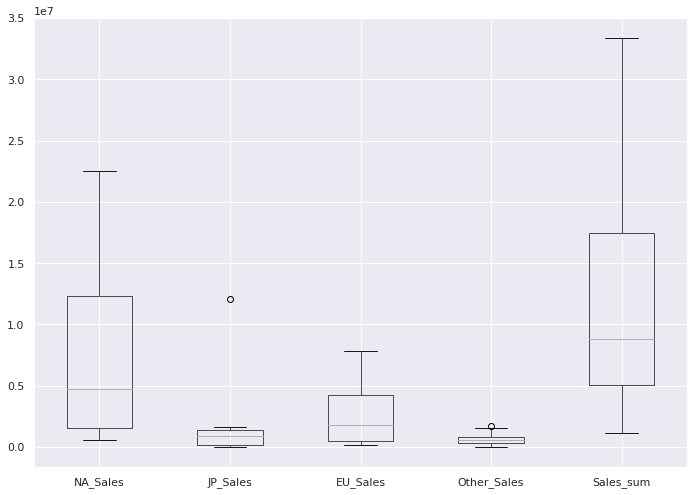

In [21]:
#중앙값과 데이터 분포를 잘 보여줄 수 있는 boxplot 이용

sns.set(rc={'figure.figsize':(11.7,8.27)})
df_genre1.boxplot(column=['NA_Sales','JP_Sales','EU_Sales','Other_Sales','Sales_sum'])
plt.show()



*   그래프 상 각 국가별로 분산의 차이가 존재한다. 북미와 유럽의 경우 비교적 넓은 분산을 갖지만 일본과 기타 국가는 그렇지 않음. 이것이 장르와 상관이 있는지 **이원 카이제곱검정을 통해** 알아볼 것이다




In [22]:
#귀무가설: 장르와 국가는 상관이 없을것이다
#대립가설: 장르과 국가는 상관이 있을것이다

import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(df_genre)
pvalue

0.0

In [23]:
#p-value 가 0이므로 장르와 국가는 충분한 상관관계를 가진다고 판단

##3.시각화##

In [24]:
import seaborn as sns  
import matplotlib.pyplot as plt 

In [25]:
df_genre1=df_genre.astype(int)

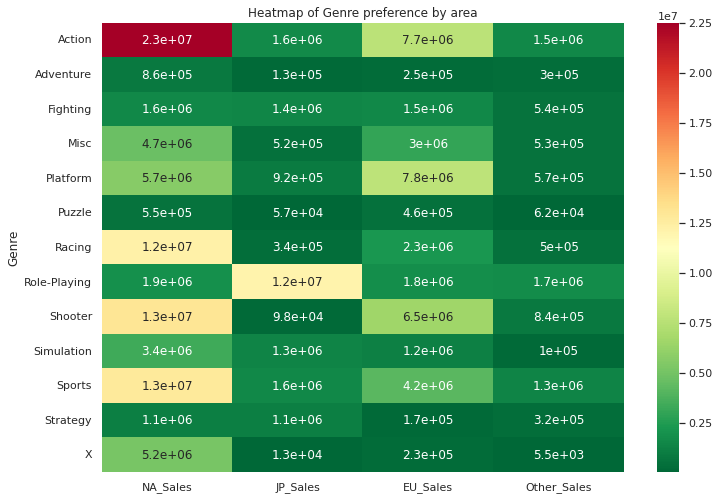

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_genre1,annot=True,cmap='RdYlGn_r')

plt.title('Heatmap of Genre preference by area', fontsize=12)

plt.show() 



*   북미는 액션, 레이싱, 슈처, 스포츠 등 역동적인 게임에 대한 강한 수요가
*   일본은 롤플레잉에 대한 수요가


*   유럽국가는 플랫폼, 슈팅게임에 대한 수요가
*   기타지역은 고루 분포된 수요가 있었음





In [27]:
#국가별 장르별 출고량을 보기 위해 barplot을 만들 것임
#이를 위해 표준화시킨 후, tidy data 형태로 만들어 주겠음

from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

df_genre1=df_genre1.reset_index()
tidy=minmax.fit_transform(df_genre)
tidy=pd.DataFrame(tidy)
tidy=pd.concat([df_genre1['Genre'],tidy],axis=1)
tidy.columns = ['Genre', 'NA_Sales', 'JP_Sales','EU_Sales','Other_Sales']

In [28]:
tidy1 = tidy.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'])

In [29]:
tidy1.head()

,Genre,variable,value
0,Action,NA_Sales,1.000000
1,Adventure,NA_Sales,0.014213
2,Fighting,NA_Sales,0.046875
3,Misc,NA_Sales,0.189102
4,Platform,NA_Sales,0.232722


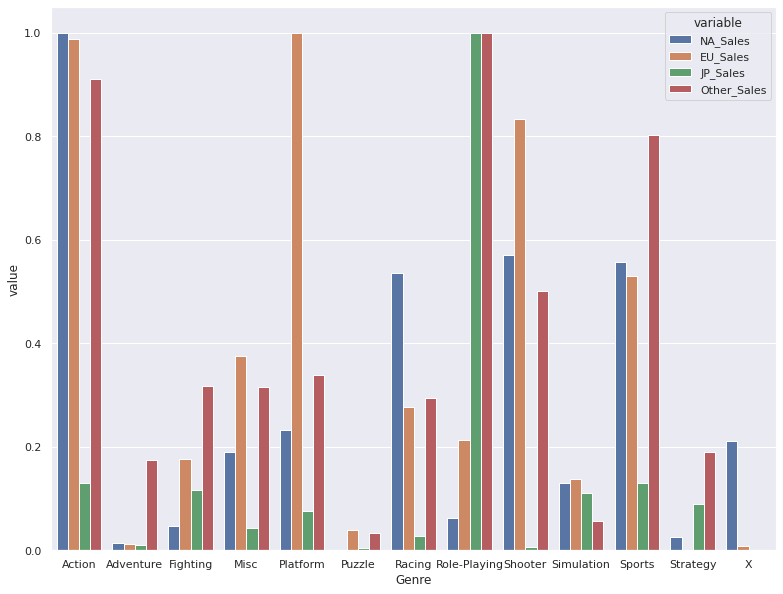

In [30]:
sns.set(rc={'figure.figsize':(13,10)})
sns.barplot(x='Genre', y='value', hue='variable', data=tidy1)



*   앞서 히트맵에서 확인한 대략적인 결과와 비슷하게 드러남
*   미국의 경우 액션게임, 레이싱게임, 슈터게임, 스포츠게임 등 역동적인 게임의 출고량이 앞도적으로 높았으며, 일본의 경우에도 롤플레잉게임의 출고량이 압도적이었음, 이는 앞서 본 boxplot 의 분산에서도 확인할 수 있었음. 유럽의 경우 액션, 플랫폼, 슈퍼, 스포츠 게임이 인기가 많으나, 앞선 두 지역에 비교해 상대적으로 고른 분포를 보임. 
*   어드벤쳐, 퍼즐, 전략, 시뮬레이션 게임은 대부분의 지역에서 인기가 없었음.





#Step4.연도별 게임 트렌드가 있을까#

##1.카이제곱검정##

In [31]:
#귀무가설: 연도와 게임 트렌드는 관련이 없을것이다
#대안가설: 연도와 게임 트렌드는 상관관계가 있을것이다
#하나의 컬럼에서 변수간 차이가 있는지 검증할 것이기 때문에 일원 카이제곱검정을 이용할 것

In [32]:
df1=df.loc[:,'NA_Sales':'Other_Sales']
df2=df1.sum(axis=1)
df2

0         40.0
1        180.0
2         20.0
3         40.0
4        250.0
         ...  
16593    200.0
16594     10.0
16595    790.0
16596    380.0
16597    170.0
Length: 16598, dtype: float64

In [33]:
df3=df.loc[:,'Year']

In [34]:
df4=pd.concat([df3, df2], axis = 1)
df4.tail()

,Year,0
16593,2006.0,200.0
16594,2005.0,10.0
16595,2015.0,790.0
16596,2013.0,380.0
16597,1996.0,170.0


In [35]:
df4['Year'].astype(int)

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16598, dtype: int64

In [36]:
df5=df4.groupby('Year',as_index=False).sum()
df5.head(5)

,Year,0
0,0.0,310.0
1,1.0,2270.0
2,2.0,210.0
3,3.0,4820.0
4,4.0,1010.0


In [37]:
df6=df5.rename(columns={0:'Sales'})

In [38]:
from scipy.stats import chisquare

chi1 = chisquare(df6['Sales'], axis=None)
chi1

Power_divergenceResult(statistic=484905085.053815, pvalue=0.0)

In [39]:
#p-value 가 0.05보다 작으므로 귀무가설 기각
#연도와 게임트렌드는 어느정도 상관관계가 있는것을 알 수 있음

##2.연도별 국가별 출고량 시각화##

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [41]:
df_country=df.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [42]:
df_country=df_country.groupby('Year',as_index=False).sum()

In [43]:
df_country=df_country[df_country['Year']>1980]
df_country['Sales_sum']=df_country[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_country.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
24,1981.0,33400.0,111850.0,0.0,320.0,145570.0
25,1982.0,26920.0,1650.0,0.0,310.0,28880.0
26,1983.0,7760.0,800.0,8100.0,140.0,16800.0
27,1984.0,33280.0,2100.0,14270.0,700.0,50350.0
28,1985.0,493270.0,4740.0,14560.0,920.0,513490.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

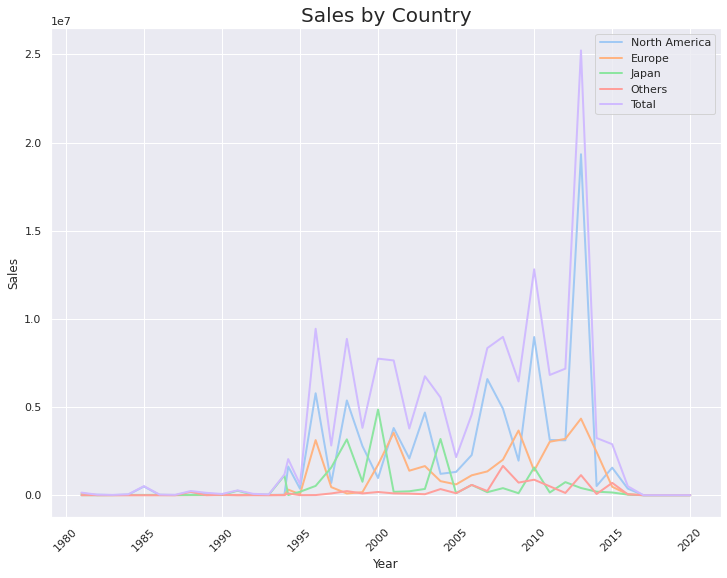

In [52]:
sns.set_palette("pastel")
sns.lineplot(df_country["Year"],df_country['NA_Sales'],label='North America',alpha = 1,linewidth=2) 
sns.lineplot(df_country['Year'], df_country['EU_Sales'],label='Europe',alpha = 1,linewidth=2)
sns.lineplot(df_country['Year'], df_country['JP_Sales'],label='Japan',alpha = 1,linewidth=2)
sns.lineplot(df_country['Year'],df_country['Other_Sales'],label='Others',alpha = 1,linewidth=2)
sns.lineplot(df_country['Year'], df_country['Sales_sum'],label='Total',alpha = 1,linewidth=2)

plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales by Country", fontsize = 20)

plt.show()




*   전반적인 매출량은 꾸준한 상승세를 보이고 2008년 이후 급격히 감소함 (2016년부터는 거의 집계되지 않았음)
*   북미, 유럽 지역이 90년대 후반부터 지속적인 매출량 1,2위를 보임, 일본과 기타 지역은 3,4위를 번갈아 하는 추세
*   일본의 경우 전반적인 출고량이 2000년대 초반까지 유럽과 비슷한 수준, 이후 감소
*   2014년 즈음 출고량 최고 도달, 2016년 이후 데이터는 존재하지 않음









#Step5.출고량이 높은 게임에 대한 분석 및 시각화 프로세스#

In [45]:
df['Sales_sum']=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

In [46]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0


In [47]:
#전체 출고량 기준 게임별 상위 10개만 추출
df_total=df.groupby(['Name']).count()
df_total = df_total.sort_values(by='Sales_sum',ascending=False)
df_total.head(10)

,Unnamed: 0,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
Name,,,,,,,,,,
Need for Speed: Most Wanted,12,12,12,12,12,12,12,12,12,12
Ratatouille,9,9,9,9,9,9,9,9,9,9
Madden NFL 07,9,9,9,9,9,9,9,9,9,9
FIFA 14,9,9,9,9,9,9,9,9,9,9
LEGO Marvel Super Heroes,9,9,9,9,9,9,9,9,9,9
Monopoly,8,8,8,8,8,8,8,8,8,8
LEGO Jurassic World,8,8,8,8,8,8,8,8,8,8
FIFA Soccer 13,8,8,8,8,8,8,8,8,8,8
Lego Batman 3: Beyond Gotham,8,8,8,8,8,8,8,8,8,8


In [48]:
pip install squarify

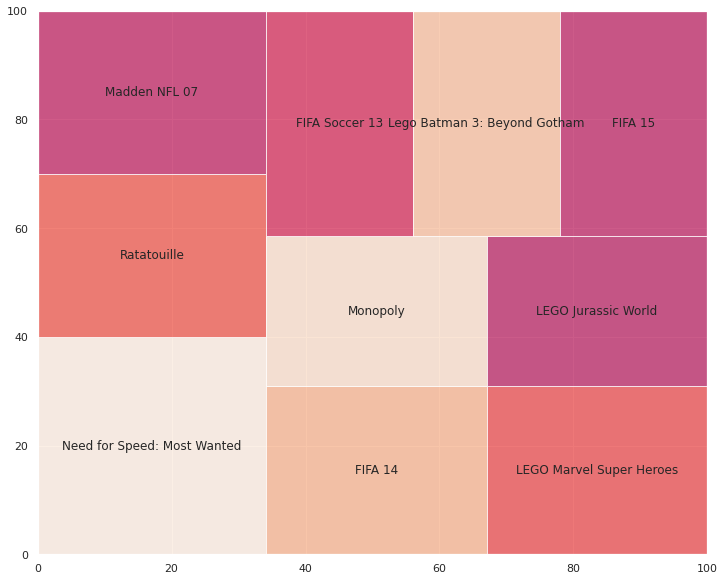

In [49]:
# treemap 시각화

import squarify

plt.figure(figsize=(12,10))

squarify.plot(sizes=df_total['Sales_sum'][:10],
             label=df_total.index.values[:10], alpha=.7)

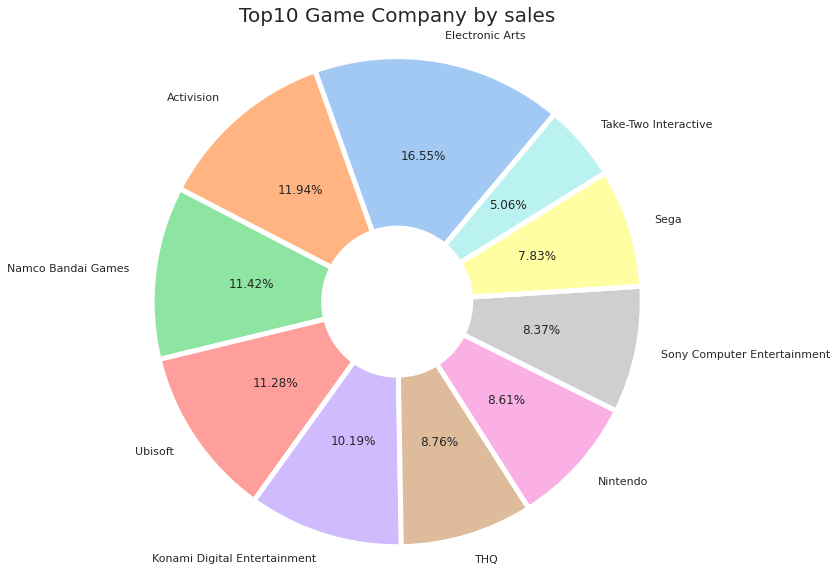

In [50]:
#전체 출고량 기준 회사별 상위 10개만 추출
df_total1=df.groupby(['Publisher']).count()
df_total1 = df_total1.sort_values(by='Sales_sum',ascending=False)
df_total1.head(10)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(12,10))
plt.pie(
        df_total1['Sales_sum'][:10], 
        labels=df_total1.index.values[:10],  
        autopct='%1.2f%%', # second decimal place 
        startangle=50,wedgeprops=wedgeprops
) 

plt.axis('equal') #  equal length of X and Y axis
plt.title('Top10 Game Company by sales', fontsize=20)
plt.show()

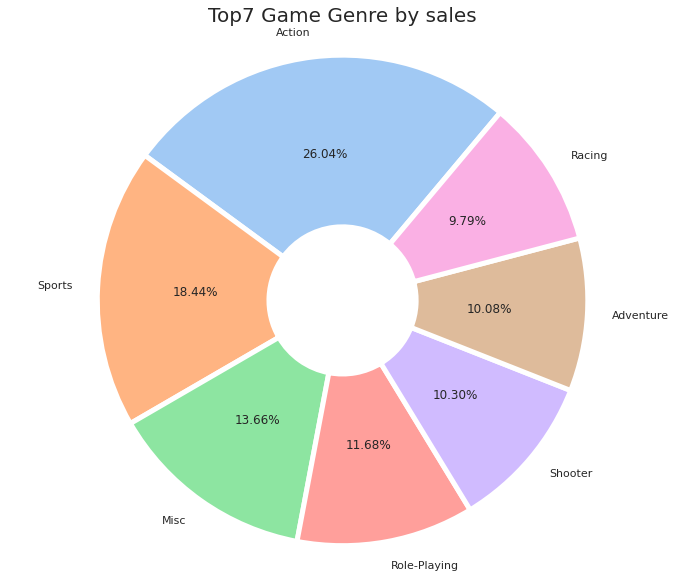

In [51]:
#전체 출고량 기준 장르별 상위 7개만 추출
df_total2=df.groupby(['Genre']).count()
df_total2 = df_total2.sort_values(by='Sales_sum',ascending=False)
df_total2.head(10)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(12,10))
plt.pie(
        df_total2['Sales_sum'][:7], 
        labels=df_total2.index.values[:7],  
        autopct='%1.2f%%', # second decimal place 
        startangle=50,wedgeprops=wedgeprops
) 

plt.axis('equal') #  equal length of X and Y axis
plt.title('Top7 Game Genre by sales', fontsize=20)
plt.show()



*   출고량에서 큰 비중을 차지하던 지역이 북미와 일본이었으며, 두 국가에서 높은 점유율을 보인 장르들이 전체 출고량의 장르 비중에도 큰 영향을 줌


